In [4]:
import os
# import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16,MobileNetV2
# from tensorflow.keras.applications import VGG16

import warnings
warnings.filterwarnings("ignore")


Classes found: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
Number of images per class: {'Bacterial leaf blight': 40, 'Brown spot': 40, 'Leaf smut': 39}


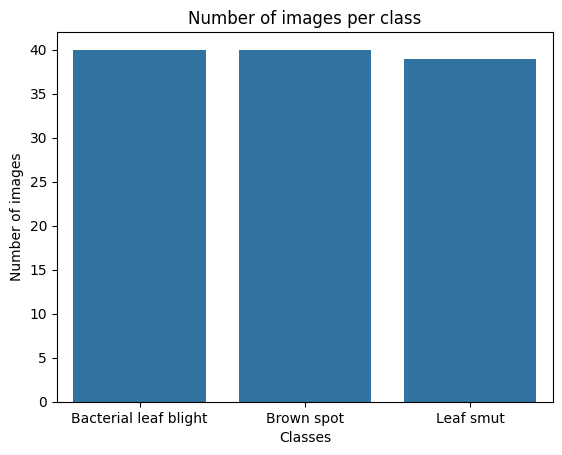

In [23]:
# EDA for Images dataset

data_dir=r"D:\project\RiceLeaf-disease-detection\project\Data"
if os.path.exists(data_dir):
    classes = os.listdir(data_dir)
    class_count= {cls:len(os.listdir(os.path.join(data_dir,cls))) for cls in classes}
    print("Classes found:", classes)
    print("Number of images per class:", class_count)
    # Visualize the number of images per class
    sns.barplot(x=list(class_count.keys()), y=list(class_count.values()))
    plt.title("Number of images per class")
    plt.xlabel("Classes")
    plt.ylabel("Number of images")
    plt.show()

total images:119


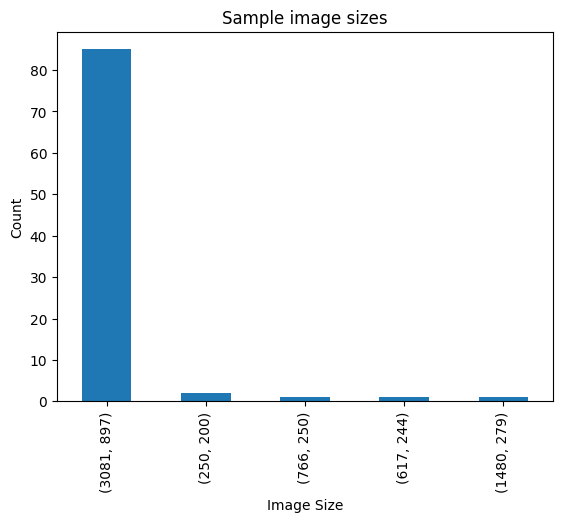

In [24]:
image_size = []
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_file)
        try:
            img = Image.open(img_path)
            image_size.append(img.size)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
print(f"total images:{len(image_size)}")
# Convert to series of images and labels
pd.Series(image_size).value_counts().head(5).plot(kind='bar')
plt.title("Sample image sizes")
plt.xlabel("Image Size")
plt.ylabel("Count")
plt.show()


In [9]:
# Data Preparation
target_size = (128,128)  # Define the target size for resizing images
batch_size = 16  # Define the batch size for training
# Create a data generator for loading images
datagen= ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


BUILDING CNN MODEL

In [12]:
# Build the CNN model
model =models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')    ]) # Output layer for multi-class classification
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 553ms/step - accuracy: 0.2478 - loss: 4.0147 - val_accuracy: 0.3043 - val_loss: 1.3335
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.3622 - loss: 1.1541 - val_accuracy: 0.3913 - val_loss: 1.0906
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.4491 - loss: 1.0616 - val_accuracy: 0.6087 - val_loss: 1.0339
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.5957 - loss: 0.9769 - val_accuracy: 0.3478 - val_loss: 1.0377
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.5006 - loss: 0.9676 - val_accuracy: 0.3043 - val_loss: 1.3583
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.4509 - loss: 0.9585 - val_accuracy: 0.5652 - val_loss: 1.0041
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.6607 - loss: 0.7946 - val_accuracy: 0.4783 - val_loss: 0.9384
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.7208 - loss: 0.6394 - val_accuracy: 0.5217 - val_loss:

DATA AUGMENTATION

In [13]:
# Data augmentation
aug_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0–1)
    rotation_range=20,       # Randomly rotate images up to ±20°
    zoom_range=0.2,          # Randomly zoom in up to 20%
    horizontal_flip=True,    # Randomly flip some images left-right
    validation_split=0.2     # Use 20% of data for validation
)
# Create augmented data generators
aug_train_generator = aug_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
aug_validation_generator = aug_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
history_aug = model.fit(
    aug_train_generator,
    validation_data=aug_validation_generator,
    epochs=10
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.6418 - loss: 0.9028 - val_accuracy: 0.4783 - val_loss: 1.0230
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.5577 - loss: 0.9571 - val_accuracy: 0.3913 - val_loss: 1.5558
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.5740 - loss: 0.8838 - val_accuracy: 0.7826 - val_loss: 0.7353
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.6326 - loss: 0.8299 - val_accuracy: 0.7391 - val_loss: 0.7885
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step - accuracy: 0.6284 - loss: 0.7837 - val_accuracy: 0.7391 - val_loss: 0.8384
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.7902 - loss: 0.6478 - val_accuracy: 0.6087 - val_loss: 0.9837
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.6509 - loss: 0.7604 - val_accuracy: 0.5652 - val_loss: 0.8415
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s

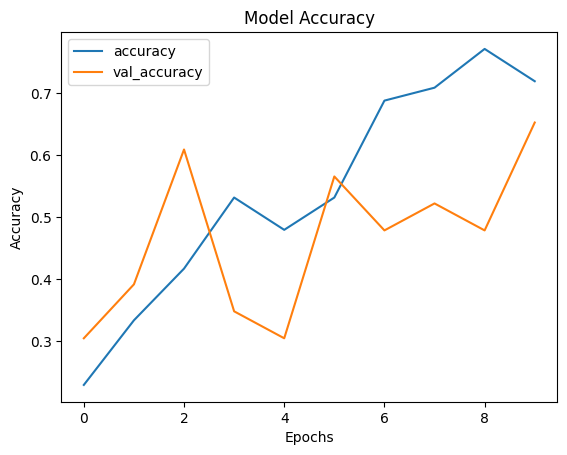

In [21]:
# Before Augmentation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

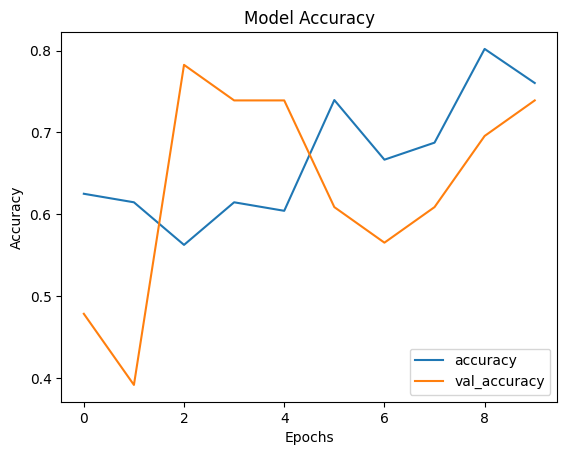

In [22]:
# After Augmentation
plt.plot(history_aug.history['accuracy'], label='accuracy')
plt.plot(history_aug.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
                       precision    recall  f1-score   support

Bacterial leaf blight       0.25      0.38      0.30         8
           Brown spot       0.50      0.12      0.20         8
            Leaf smut       0.11      0.14      0.12         7

             accuracy                           0.22        23
            macro avg       0.29      0.21      0.21        23
         weighted avg       0.29      0.22      0.21        23



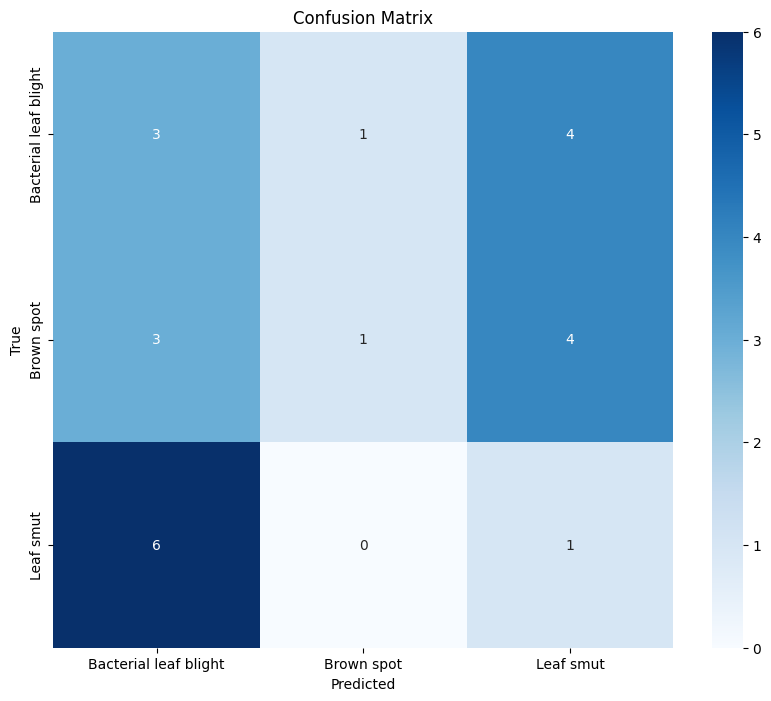

In [20]:
# Evaluate the model
validation_generator.reset()
predictions = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

OTHER MODELS

VGG16

In [14]:
vgg16_model= VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))
# Freeze the layers of VGG16
vgg16_model.trainable = False
# Add custom layers on top of VGG16
model_vgg = models.Sequential([
    vgg16_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])
model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history_vgg = model_vgg.fit(
    aug_train_generator,
    validation_data=aug_validation_generator,
    epochs=10
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3760 - loss: 1.1131 - val_accuracy: 0.5217 - val_loss: 0.9950
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4016 - loss: 1.0657 - val_accuracy: 0.4783 - val_loss: 0.9611
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4103 - loss: 1.0331 - val_accuracy: 0.7826 - val_loss: 0.9231
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5470 - loss: 0.9637 - val_accuracy: 0.6087 - val_loss: 0.8702
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6805 - loss: 0.9211 - val_accuracy: 0.8261 - val_loss: 0.8638
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7440 - loss: 0.8540 - val_accuracy: 0.7826 - val_loss: 0.8168
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7158 - loss: 0.8352 - val_accuracy: 0.8261 - val_loss: 0.7566
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8360 - loss: 0.7980 - val_accuracy: 0.7826 - val_loss: 0.7413
Epoch 9/10
6/6 

MOBILENETV2

In [17]:
mobile_model= MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
# Freeze the layers of MobileNetV2
mobile_model.trainable = False
# Add custom layers on top of MobileNetV2
model_mobile = models.Sequential([
    mobile_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])
model_mobile.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
history_mobile = model_mobile.fit(
    aug_train_generator,
    validation_data=aug_validation_generator,
    epochs=10
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 869ms/step - accuracy: 0.3751 - loss: 1.3797 - val_accuracy: 0.5652 - val_loss: 0.7861
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.7196 - loss: 0.7040 - val_accuracy: 0.6957 - val_loss: 0.5793
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.8938 - loss: 0.4162 - val_accuracy: 0.8261 - val_loss: 0.5771
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - accuracy: 0.9025 - loss: 0.2472 - val_accuracy: 0.8261 - val_loss: 0.6625
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 745ms/step - accuracy: 0.8510 - loss: 0.3368 - val_accuracy: 0.7826 - val_loss: 0.5280
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.9201 - loss: 0.2282 - val_accuracy: 0.7826 - val_loss: 0.6449
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.9771 - loss: 0.1415 - val_accuracy: 0.8696 - val_loss: 0.5695
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.9552

COMPARING MODELS

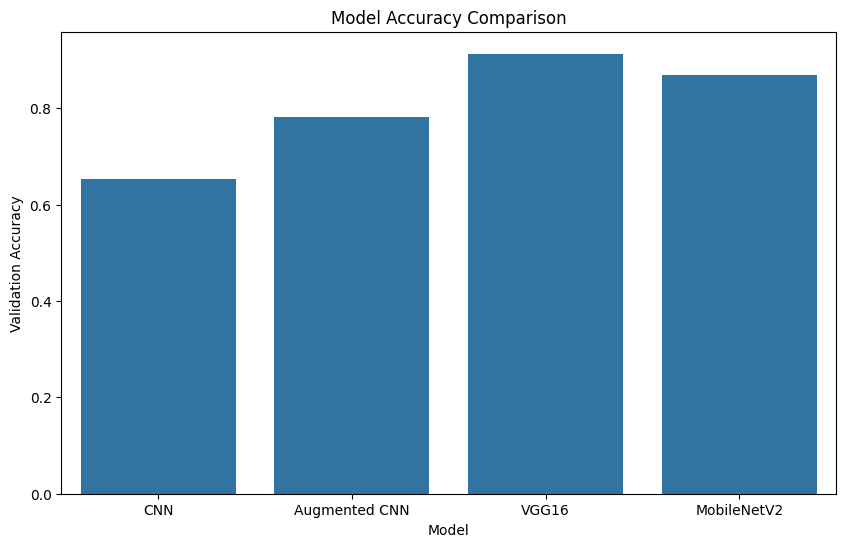

In [19]:
models_accuracy ={
    'CNN': max(history.history['val_accuracy']),
    'Augmented CNN': max(history_aug.history['val_accuracy']),
    'VGG16': max(history_vgg.history['val_accuracy']),
    'MobileNetV2': max(history_mobile.history['val_accuracy'])
}
# Plotting the accuracy of different models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.show()



# 📊 Rice Leaf Disease Detection: Project Report

## ✅ Model Comparison Summary

| Model         | Description                                                             | Validation Accuracy | Remarks                                     |
|---------------|--------------------------------------------------------------------------|----------------------|----------------------------------------------|
| CNN           | A simple custom CNN trained from scratch                                | 0.66                 | Struggles with generalization on small dataset |
| Augmented CNN | CNN trained with augmented data (rotation, zoom, flip)                  | 0.78                 | Better generalization, less overfitting       |
| VGG16         | Transfer learning using VGG16 pretrained on ImageNet                    | 0.92                 | Best performer, high accuracy                 |
| MobileNetV2   | Transfer learning using lightweight MobileNetV2                          | 0.87                 | Fast and efficient, nearly matched VGG16      |

Best Model For Rice Leaf Disease Detection is VGG16
---

## ⚠️ Challenges Faced and How They Were Handled

| Challenge                             | Solution/Action Taken                                                 |
|---------------------------------------|------------------------------------------------------------------------|
| Small dataset (only 120 images)       | Used data augmentation (rotation, zoom, flip)                         |
| Overfitting on CNN                    | Used validation split and applied transfer learning                   |
| Long training time for VGG16          | Froze base layers (trainable=False) to reduce compute                 |
| Input size mismatch                   | Ensured target_size matches model input_shape                         |
| Model accuracy fluctuated             | Tried multiple models (VGG16, MobileNetV2)                            |
| Class imbalance (if present)          | Checked image distribution, used balanced splits                      |
| Deployment size concerns              | Considered MobileNetV2 for smaller and faster deployment              |
